In [26]:
import pandas as pd
import numpy as np

In [27]:
from google.colab import files
uploaded = files.upload()

Saving pizza_sales_excel_file.csv to pizza_sales_excel_file (1).csv


In [28]:
df_Pizzasales = pd.read_csv('pizza_sales_excel_file.csv')

**Data summerizing**

In [29]:
df_Pizzasales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [30]:
df_Pizzasales.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [31]:
df_Pizzasales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


**DATA CLEANING** (Missing value)

In [32]:
missing_values = df_Pizzasales.isnull().sum()
print(missing_values)

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


**DATA CLEANING** (Duplicates)

In [33]:
df_Pizzasales = df_Pizzasales.drop_duplicates()

**KPI's**

1.	Total Revenue of the PIZZA sales

In [34]:
total_revenue = df_Pizzasales['total_price'].sum()
print(f"Total revenue of Pizza sales are: {total_revenue}")

Total revenue of Pizza sales are: 817860.05


2.	Average order values

In [35]:
Average_orders = df_Pizzasales['order_id'].mean()
print(f"Average orders of Pizza are: {Average_orders}")

Average orders of Pizza are: 10701.479761415056


3.	Total sold PIZZA

In [36]:
Total_sold_pizza = df_Pizzasales['quantity'].count()
print(f"Total spld pizza are: {Total_sold_pizza}")

Total spld pizza are: 48620


4.	total orders

In [37]:
Total_orders = df_Pizzasales['order_id'].sum()
print(f"Total orders of pizza are: {Total_orders}")

Total orders of pizza are: 520305946


5.	Average pizza number per order

In [38]:
total_pizza_sales_per_order = df_Pizzasales.groupby('order_id')['quantity'].sum().reset_index()

In [39]:
Average_pizza_sales_per_order = total_pizza_sales_per_order['quantity'].mean()
print(f"Average pizza Sales Per Order: {Average_pizza_sales_per_order}")

Average pizza Sales Per Order: 2.321967213114754


6.	The trending hour for Sold pizza

In [40]:
# Convert 'order_time' to datetime format
df_Pizzasales['order_time'] = pd.to_datetime(df_Pizzasales['order_time'])

# Extract the hour from the 'order_time'
df_Pizzasales['hour'] = df_Pizzasales['order_time'].dt.hour

# Group by hour and sum the 'quantity' sold
hourly_pizza_sales = df_Pizzasales.groupby('hour')['quantity'].sum().reset_index()

# Sort the results by quantity sold in descending order to find trending hours
trending_pizza_sales_hours = hourly_pizza_sales.sort_values(by='quantity', ascending=False)

# Print the trending sales hours
print("Trending Sales Hours:")
print(trending_pizza_sales_hours)

<ipython-input-40-ce98a87d00e7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Pizzasales['order_time'] = pd.to_datetime(df_Pizzasales['order_time'])


Trending Sales Hours:
    hour  quantity
3     12      6776
4     13      6413
9     18      5417
8     17      5211
10    19      4406
7     16      4239
5     14      3613
11    20      3534
6     15      3216
2     11      2728
12    21      2545
13    22      1386
14    23        68
1     10        18
0      9         4


7.	sales of every pizza category

In [41]:
# Group by pizza category and sum the sales
pizza_category_sales = df_Pizzasales.groupby('pizza_category')['total_price'].sum().reset_index()

# Sort the results by total sales in descending order
pizza_category_sales = pizza_category_sales.sort_values(by='total_price', ascending=False)

# Print the sales for each pizza category
print("Sales for Every Pizza Category:")
print(pizza_category_sales)

Sales for Every Pizza Category:
  pizza_category  total_price
1        Classic    220053.10
2        Supreme    208197.00
0        Chicken    195919.50
3         Veggie    193690.45


8.	sales of pizza according to size

In [42]:
# Group by pizza size and sum the sales
Pizza_size_sales = df_Pizzasales.groupby('pizza_size')['total_price'].sum().reset_index()

# Sort the results by total sales in descending order
Pizza_size_sales = Pizza_size_sales.sort_values(by='total_price', ascending=False)

# Print the sales for each pizza size
print("Sales of Pizza According to Size:")
print(Pizza_size_sales)

Sales of Pizza According to Size:
  pizza_size  total_price
0          L    375318.70
1          M    249382.25
2          S    178076.50
3         XL     14076.00
4        XXL      1006.60


9.	Top 5-pizza revenue

In [43]:
# Calculate total revenue for each pizza
df_Pizzasales['total_revenue'] = df_Pizzasales['total_price'] * df_Pizzasales['quantity']

# Group by pizza name and sum the revenue
top_pizza_revenue = df_Pizzasales.groupby('pizza_name')['total_revenue'].sum().reset_index()

# Sort by revenue in descending order and get the top 5 pizzas
# Changed 'revenue' to 'total_revenue' in the 'by' parameter
top_5_pizza_revenue = top_pizza_revenue.sort_values(by='total_revenue', ascending=False).head(5)

# Print the top 5 pizzas by revenue
print("Top 5 Pizzas by Revenue:")
print(top_5_pizza_revenue)

Top 5 Pizzas by Revenue:
                      pizza_name  total_revenue
30        The Thai Chicken Pizza       45679.75
0     The Barbecue Chicken Pizza       45080.00
4   The California Chicken Pizza       44020.00
7       The Classic Deluxe Pizza       39366.50
26       The Spicy Italian Pizza       36233.25


10.	Bottom 5-pizza revenue

In [44]:
# Calculate total revenue for each pizza
df_Pizzasales['total_revenue'] = df_Pizzasales['total_price'] * df_Pizzasales['quantity']

# Group by pizza name and sum the revenue
bottom_pizza_revenue = df_Pizzasales.groupby('pizza_name')['total_revenue'].sum().reset_index()

# Sort by revenue in ascending order to get the bottom 5 pizzas
bottom_5_pizza_revenue = bottom_pizza_revenue.sort_values(by='total_revenue', ascending=True).head(5)

# Print the bottom 5 pizzas by revenue
print("Bottom 5 Pizzas by Revenue:")
print(bottom_5_pizza_revenue)

Bottom 5 Pizzas by Revenue:
                   pizza_name  total_revenue
2        The Brie Carre Pizza       12061.50
11     The Green Garden Pizza       14228.25
28  The Spinach Supreme Pizza       15585.25
16    The Mediterranean Pizza       15755.50
27    The Spinach Pesto Pizza       16011.50


11.	Top 5-pizza Quantity

In [45]:
# Group by pizza name and sum the quantity sold
top_pizza_quantity = df_Pizzasales.groupby('pizza_name')['quantity'].sum().reset_index()

# Sort by quantity in descending order and get the top 5 pizzas
top_5_pizza_quantity = top_pizza_quantity.sort_values(by='quantity', ascending=False).head(5)

# Print the top 5 pizzas by quantity sold
print("Top 5 Pizzas by Quantity Sold:")
print(top_5_pizza_quantity)

Top 5 Pizzas by Quantity Sold:
                    pizza_name  quantity
7     The Classic Deluxe Pizza      2453
0   The Barbecue Chicken Pizza      2432
12          The Hawaiian Pizza      2422
20         The Pepperoni Pizza      2418
30      The Thai Chicken Pizza      2371


12.	Bottom 5-pizza Quantity

In [46]:
# Group by pizza name and sum the quantity sold
bottom_pizza_quantity = df_Pizzasales.groupby('pizza_name')['quantity'].sum().reset_index()

# Sort by quantity in ascending order to get the bottom 5 pizzas
bottom_5_pizza_quantity = bottom_pizza_quantity.sort_values(by='quantity', ascending=True).head(5)

# Print the bottom 5 pizzas by quantity sold
print("Bottom 5 Pizzas by Quantity Sold:")
print(bottom_5_pizza_quantity)

Bottom 5 Pizzas by Quantity Sold:
                   pizza_name  quantity
2        The Brie Carre Pizza       490
16    The Mediterranean Pizza       934
3         The Calabrese Pizza       937
28  The Spinach Supreme Pizza       950
24      The Soppressata Pizza       961


13.	TOP 5 by total orders

In [47]:
# Count total orders for each pizza (using unique order_id)
top_pizza_orders = df_Pizzasales.groupby('pizza_name')['order_id'].nunique().reset_index()

# Rename the column for clarity
top_pizza_orders.columns = ['pizza_name', 'total_orders']

# Sort by total orders in descending order and get the top 5 pizzas
top_5_pizza_orders = top_pizza_orders.sort_values(by='total_orders', ascending=False).head(5)

# Print the top 5 pizzas by total orders
print("Top 5 Pizzas by Total Orders:")
print(top_5_pizza_orders)

Top 5 Pizzas by Total Orders:
                    pizza_name  total_orders
7     The Classic Deluxe Pizza          2329
12          The Hawaiian Pizza          2280
20         The Pepperoni Pizza          2278
0   The Barbecue Chicken Pizza          2273
30      The Thai Chicken Pizza          2225


14.	Bottom 5 by total orders

In [48]:
# Count total orders for each pizza (using unique order_id)
bottom_pizza_orders = df_Pizzasales.groupby('pizza_name')['order_id'].nunique().reset_index()

# Rename the column for clarity
bottom_pizza_orders.columns = ['pizza_name', 'total_orders']

# Sort by total orders in ascending order to get the bottom 5 pizzas
bottom_5_pizza_orders = bottom_pizza_orders.sort_values(by='total_orders', ascending=True).head(5)

# Print the bottom 5 pizzas by total orders
print("Bottom 5 Pizzas by Total Orders:")
print(bottom_5_pizza_orders)

Bottom 5 Pizzas by Total Orders:
                   pizza_name  total_orders
2        The Brie Carre Pizza           480
16    The Mediterranean Pizza           912
3         The Calabrese Pizza           918
28  The Spinach Supreme Pizza           918
6     The Chicken Pesto Pizza           938


**Plotting Data Using Matplot**


In [49]:
import matplotlib.pyplot as plt

Bar Chart of of pizza name

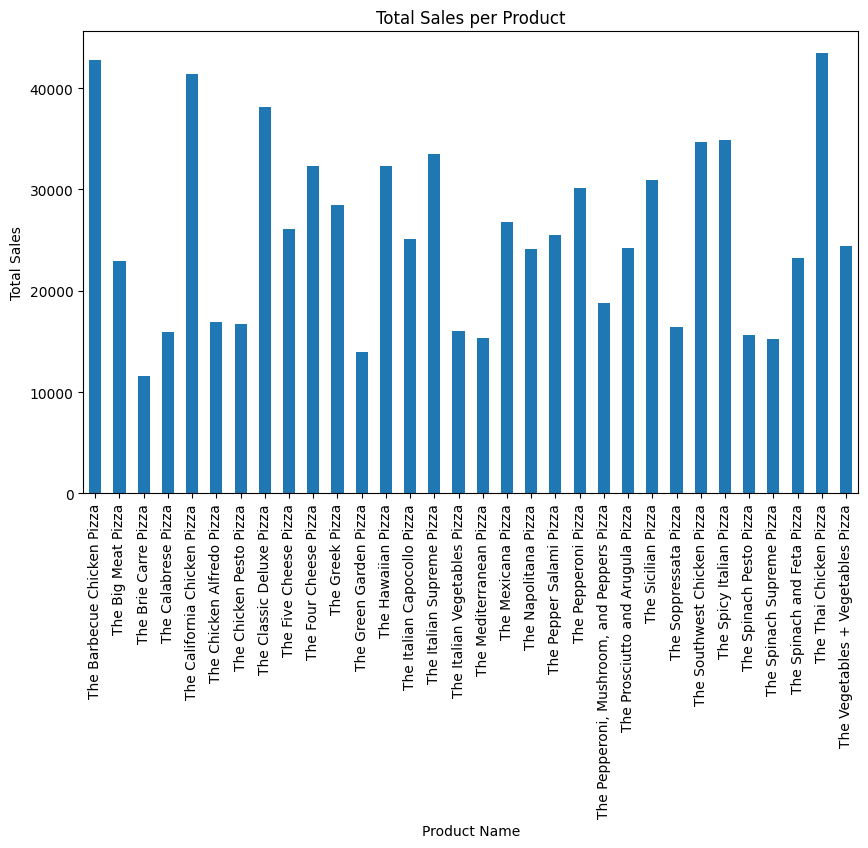

In [53]:
# Calculate the sum of sales for each Pizza name
Pizza_sales_summary = df_Pizzasales.groupby('pizza_name')['total_price'].sum()

# Create a bar chart to visualize the sum of sales
plt.figure(figsize=(10, 6))
# The original code used 'sales_summary', assuming it's meant to be 'Pizza_sales_summary'
Pizza_sales_summary.plot(kind='bar')  # Use the correct variable for plotting
plt.title('Total Sales per Product')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

Sales for each pizza category


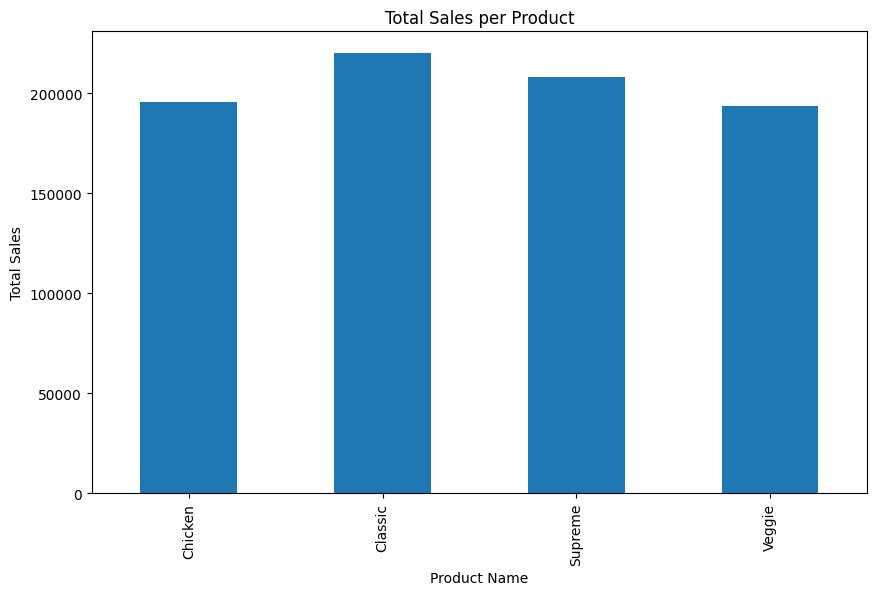

In [54]:
# Calculate the sum of sales for each Pizza name
Pizza_sales_summary = df_Pizzasales.groupby('pizza_category')['total_price'].sum()

# Create a bar chart to visualize the sum of sales
plt.figure(figsize=(10, 6))
# The original code used 'sales_summary', assuming it's meant to be 'Pizza_sales_summary'
Pizza_sales_summary.plot(kind='bar')  # Use the correct variable for plotting
plt.title('Total Sales per Product')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

Relation between price and quantity sales for each category

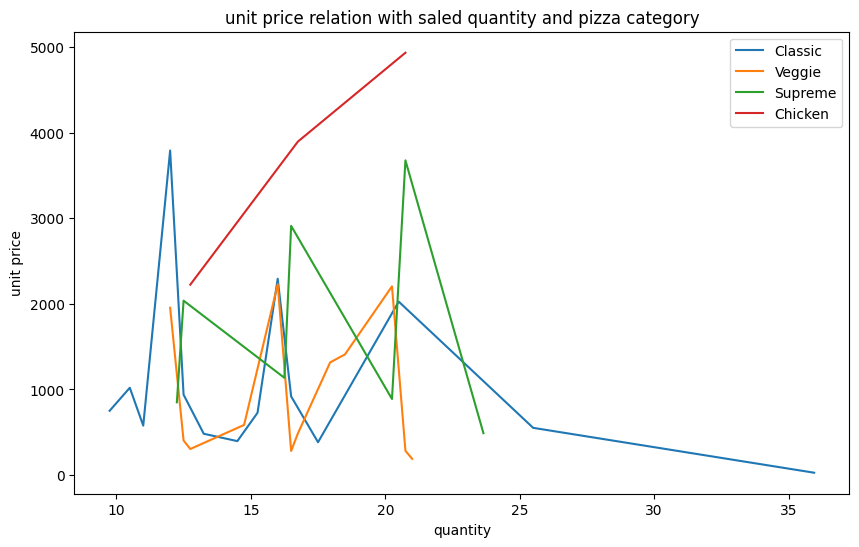

In [69]:
# Group the data by date and product category, and calculate the sum of sales
grouped_data = df_Pizzasales.groupby(['unit_price', 'pizza_category'])['quantity'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
for category in grouped_data['pizza_category'].unique():
    category_data = grouped_data[grouped_data['pizza_category'] == category]
    # Use 'order_date' instead of 'date' for the x-axis
    plt.plot(category_data['unit_price'], category_data['quantity'], label=category)

plt.title('unit price relation with saled quantity and pizza category')
plt.xlabel('quantity')
plt.ylabel('unit price')
plt.legend()
plt.show()

Percentage of Sales per Pizza

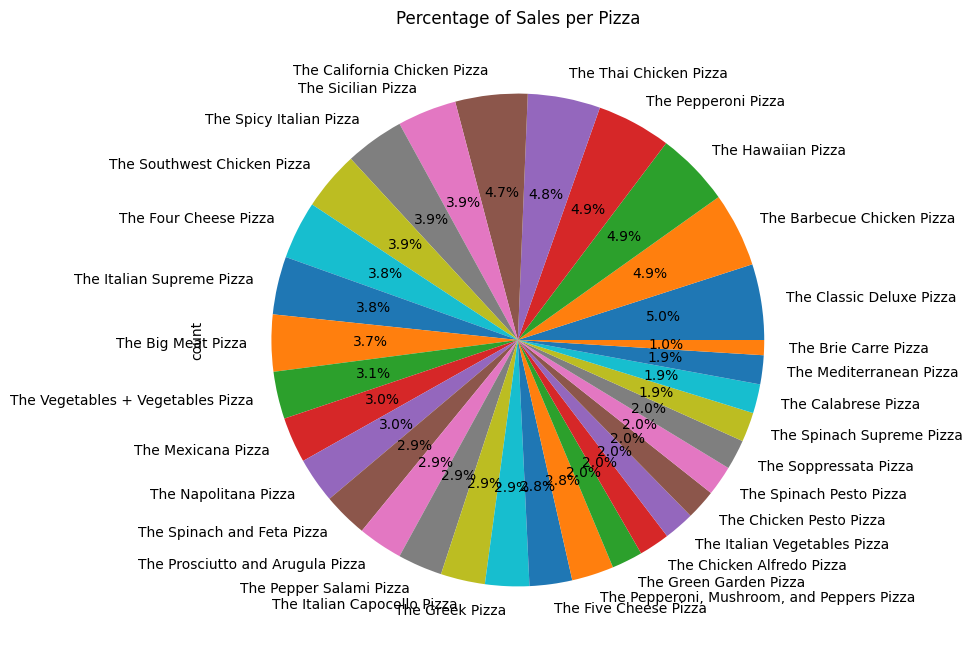

In [70]:
# Calculate the count of sales for each product
Pizza_sales_count = df_Pizzasales['pizza_name'].value_counts()

# Create a pie chart to visualize the count of sales
plt.figure(figsize=(8, 8))
Pizza_sales_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Sales per Pizza')
plt.show()